**Nama: Hafshah Mar'atu Shaliha**

**ID Dicoding: Hafshah shaliha**

**Judul Proyek: Proyek Analisis Sentimen Bca.com**

# **Import Library**

In [7]:
!pip install deep-translator

In [8]:
!pip install sastrawi
!pip install wordcloud

In [9]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik

import random
import time
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca

import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from nltk.corpus import wordnet

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score

from deep_translator import GoogleTranslator

from tqdm import tqdm
import csv
import requests
from io import StringIO

# TensorFlow & Keras for NLP preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [10]:
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('punkt_tab')
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Load Data**


In [11]:
dataset_path = "/content/ulasan_aplikasi_dellimiter_pipe.csv"

In [12]:
app_reviews_df = pd.read_csv(dataset_path,delimiter="|")

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
print(jumlah_ulasan, jumlah_kolom)

38126 11


In [13]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3f93c07c-76b7-4939-9484-464ddfe835d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong diperbaiki, kena saya selalu diminta ma...",3,3,4.5.8,2025-02-20 11:17:59,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-02-20 12:08:18,4.5.8
1,96fb5e50-3df0-4667-9ac6-e97a57ff16c1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Min, tolong ini setelah update kenapa indikato...",5,74,4.5.8,2025-02-19 01:52:42,Mohon maaf atas ketidaknyamanannya. Apabila la...,2025-02-19 02:09:50,4.5.8
2,1bfdd035-50c9-4ac4-8a41-b4b288b4bb68,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Terima kasih pengembang bca mobile, sudah ada ...",3,3,4.5.7,2025-02-16 22:57:52,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-02-17 01:48:50,4.5.7
3,f07788fd-b7bc-418b-ba92-ab7a30f1ba0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk aplikasi berjalan sangat baik dan mudah ...,5,79,4.5.7,2025-02-11 11:35:21,Mohon maaf atas ketidaknyamanannya. Apabila la...,2025-02-11 12:03:17,4.5.7
4,e12f972a-a990-4531-9b53-d010b58fa54e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat disayangkan, setelah pindah dari HP lam...",2,26,4.5.7,2025-01-27 01:02:00,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt...",2025-01-27 01:39:20,4.5.7


In [14]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38126 entries, 0 to 38125
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              38126 non-null  object
 1   userName              38126 non-null  object
 2   userImage             38126 non-null  object
 3   content               38126 non-null  object
 4   score                 38126 non-null  int64 
 5   thumbsUpCount         38126 non-null  int64 
 6   reviewCreatedVersion  32287 non-null  object
 7   at                    38126 non-null  object
 8   replyContent          37204 non-null  object
 9   repliedAt             37204 non-null  object
 10  appVersion            32287 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.2+ MB


In [15]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [16]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31496 entries, 0 to 38125
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              31496 non-null  object
 1   userName              31496 non-null  object
 2   userImage             31496 non-null  object
 3   content               31496 non-null  object
 4   score                 31496 non-null  int64 
 5   thumbsUpCount         31496 non-null  int64 
 6   reviewCreatedVersion  31496 non-null  object
 7   at                    31496 non-null  object
 8   replyContent          31496 non-null  object
 9   repliedAt             31496 non-null  object
 10  appVersion            31496 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.9+ MB


In [17]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print(jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat)

31496 11


# **Pre-processing**

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

cleaningText(text): Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

casefoldingText(text): Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

tokenizingText(text): Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

filteringText(text): Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

stemmingText(text): Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

toSentence(list_words): Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [18]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [19]:
slangwords = { "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "sdh": "sudah", "nggak": "tidak", "ngga": "tidak", "mudahhh": "mudah", "dipakek": "digunakan", "malah": "bahkan", "tranfer": "transfer", "mff": "maaf", "ambnkking": "mbanking", "ngabisin": "menghabiskan", "tiap": "setiap", "tiba2": "tiba-tiba", "krim": "kirim", "kmrin": "kemarin", "gak": "tidak", "mana": "terlebih", "hadeuhhh": "waduhr", "simple": "sederhana", "ruwet": "sulit", "ajalah": "saja", "tdk": "tidak", "bs": "bisa", "msh": "masih", "dpt": "dapat", "force": "paksa", "close": "tutup", "dahuliu": "dahulu", "dgn": "dengan", "g": "tidak", "aja": "saja", "tetiba": "tiba-tiba", "please": "mohon", "ndak": "tidak", "buanyak": "banyak", "ribet": "rumit", "trakhir": "terakhir", "doank": "doang", "byk": "banyak", "bgt": "banget", "skrg": "sekarang", "nggk": "tidak", "seting": "setting", "apk": "aplikasi", "hrs": "harus", "gabisa": "tidak bisa", "auto": "otomatis", "pdahal": "padahal", "copot": "lepas", "restart": "memulai ulang", "cs": "customer service", "yg": "yang", "berhentipun": "berhenti pun", "diklik": "ditekan", "aktiv": "aktif", "trimakasi..": "terima kasih", "ininpenting": "ini penting", "krn": "karena", "aneh2": "aneh-aneh", "satset": "cepat", "lsg": "langsung", "dalat": "dapat", "dar": "dari", "tsb": "tersebut", "kenyaman": "kenyamanan", "dulu": "dahulu", "nutup": "menutup", "sy": "saya", "ketutup": "menutup", "k": "ke", "gmn": "bagaimana", "trus": "terus", "lg": "lagi", "udah": "sudah", "dll": "dan lain lain", "jg": "jadi", "ttp": "tetap", "anjirrlah..": "anjing", "cuman": "cuma", "taik": "tahi", "brg": "bareng", "wa": "whatsapp", "bru": "baru", "asulah": "anjing", "updatan": "update", "ngalamin": "mengalami", "nyuru": "menyuruh", "kayak": "seperti", "kaya": "kayak", "seudah": "setelah", "mo": "mau", "sbg": "sebagai", "maap": "maaf", "komplen": "komplain", "ama": "sama", "teejadi": "terjadi", "gaisa": "tidak bisa", "vidio": "video", "sinii": "sini", "kluar": "keluar", "msk": "masuk", "karna": "karena", "smoga": "semoga", "mmbantu": "membantu", "hr": "hari", "cepet": "cepat", "verso": "versi", "utk": "untuk", "panjenengan": "anda", "eror": "error", "moso": "masa", "tlg": "tolong", "anehh": "aneh", "yah": "ya", "dg": "dengan", "kebuang": "terbuang", "dah": "deh", "semantara": "sementara", "instal": "install", "gtau": "tidak tahu", "gua": "saya"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [20]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3f93c07c-76b7-4939-9484-464ddfe835d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong diperbaiki, kena saya selalu diminta ma...",3,3,4.5.8,2025-02-20 11:17:59,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-02-20 12:08:18,4.5.8
1,96fb5e50-3df0-4667-9ac6-e97a57ff16c1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Min, tolong ini setelah update kenapa indikato...",5,74,4.5.8,2025-02-19 01:52:42,Mohon maaf atas ketidaknyamanannya. Apabila la...,2025-02-19 02:09:50,4.5.8
2,1bfdd035-50c9-4ac4-8a41-b4b288b4bb68,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Terima kasih pengembang bca mobile, sudah ada ...",3,3,4.5.7,2025-02-16 22:57:52,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-02-17 01:48:50,4.5.7
3,f07788fd-b7bc-418b-ba92-ab7a30f1ba0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk aplikasi berjalan sangat baik dan mudah ...,5,79,4.5.7,2025-02-11 11:35:21,Mohon maaf atas ketidaknyamanannya. Apabila la...,2025-02-11 12:03:17,4.5.7
4,e12f972a-a990-4531-9b53-d010b58fa54e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat disayangkan, setelah pindah dari HP lam...",2,26,4.5.7,2025-01-27 01:02:00,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt...",2025-01-27 01:39:20,4.5.7
...,...,...,...,...,...,...,...,...,...,...,...
38120,166c7cbf-442f-4984-8998-997fa362b59d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya udah mendonlot beberapa kali di suruh ula...,5,0,2.5.3,2020-05-21 10:42:18,"Untuk kendala yang Bapak/Ibu alami, kami saran...",2020-07-09 09:18:53,2.5.3
38121,30bd47f3-020e-49b2-bba7-2223bfc7f2ac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gabisa di buka gabisa di liat saldo tf dll say...,1,0,2.0.0,2019-03-24 20:35:05,"Mohon maaf atas ketidaknyamanannya, jika masih...",2019-03-26 10:56:07,2.0.0
38123,d7a9aa76-8da9-45a8-8f19-cc0bcc2ec428,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Waduh kacau nihh ... Pemeliharaan nya kelamaan...,3,0,2.8.9,2022-03-02 13:45:53,Mohon maaf atas kendala yang terjadi. Kami inf...,2022-03-04 05:56:23,2.8.9
38124,b6ac72b1-b8bb-4bb8-a2a8-2d93aebb642e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ribet, jangan updet Mulu, bikin ribet transaks...",2,0,2.5.3,2020-05-23 11:04:46,"Mohon maaf atas ketidaknyamanannya, mohon info...",2020-06-30 12:19:19,2.5.3


In [21]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [22]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,3f93c07c-76b7-4939-9484-464ddfe835d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong diperbaiki, kena saya selalu diminta ma...",3,3,4.5.8,2025-02-20 11:17:59,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-02-20 12:08:18,4.5.8,Tolong diperbaiki kena saya selalu diminta mas...,tolong diperbaiki kena saya selalu diminta mas...,tolong diperbaiki kena saya selalu diminta mas...,"[tolong, diperbaiki, kena, saya, selalu, dimin...","[tolong, diperbaiki, kena, masukan, daftar, ul...",tolong diperbaiki kena masukan daftar ulang no...
1,96fb5e50-3df0-4667-9ac6-e97a57ff16c1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Min, tolong ini setelah update kenapa indikato...",5,74,4.5.8,2025-02-19 01:52:42,Mohon maaf atas ketidaknyamanannya. Apabila la...,2025-02-19 02:09:50,4.5.8,Min tolong ini setelah update kenapa indikator...,min tolong ini setelah update kenapa indikator...,min tolong ini setelah update kenapa indikator...,"[min, tolong, ini, setelah, update, kenapa, in...","[min, tolong, update, indikator, merah, jaring...",min tolong update indikator merah jaringan ama...
2,1bfdd035-50c9-4ac4-8a41-b4b288b4bb68,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Terima kasih pengembang bca mobile, sudah ada ...",3,3,4.5.7,2025-02-16 22:57:52,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-02-17 01:48:50,4.5.7,Terima kasih pengembang bca mobile sudah ada k...,terima kasih pengembang bca mobile sudah ada k...,terima kasih pengembang bca mobile sudah ada k...,"[terima, kasih, pengembang, bca, mobile, sudah...","[terima, kasih, pengembang, bca, mobile, kemaj...",terima kasih pengembang bca mobile kemajuan ak...
3,f07788fd-b7bc-418b-ba92-ab7a30f1ba0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk aplikasi berjalan sangat baik dan mudah ...,5,79,4.5.7,2025-02-11 11:35:21,Mohon maaf atas ketidaknyamanannya. Apabila la...,2025-02-11 12:03:17,4.5.7,Untuk aplikasi berjalan sangat baik dan mudah ...,untuk aplikasi berjalan sangat baik dan mudah ...,untuk aplikasi berjalan sangat baik dan mudah ...,"[untuk, aplikasi, berjalan, sangat, baik, dan,...","[aplikasi, berjalan, mudah, menyesalkan, pakai...",aplikasi berjalan mudah menyesalkan pakai data...
4,e12f972a-a990-4531-9b53-d010b58fa54e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat disayangkan, setelah pindah dari HP lam...",2,26,4.5.7,2025-01-27 01:02:00,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt...",2025-01-27 01:39:20,4.5.7,Sangat disayangkan setelah pindah dari HP lama...,sangat disayangkan setelah pindah dari hp lama...,sangat disayangkan setelah pindah dari hp lama...,"[sangat, disayangkan, setelah, pindah, dari, h...","[disayangkan, pindah, hp, hp, data, pastikan, ...",disayangkan pindah hp hp data pastikan terkend...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38120,166c7cbf-442f-4984-8998-997fa362b59d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya udah mendonlot beberapa kali di suruh ula...,5,0,2.5.3,2020-05-21 10:42:18,"Untuk kendala yang Bapak/Ibu alami, kami saran...",2020-07-09 09:18:53,2.5.3,Saya udah mendonlot beberapa kali di suruh ula...,saya udah mendonlot beberapa kali di suruh ula...,saya sudah mendonlot beberapa kali di suruh ul...,"[saya, sudah, mendonlot, beberapa, kali, di, s...","[mendonlot, kali, suruh, ulang, jad, susah, tr...",mendonlot kali suruh ulang jad susah transeper...
38121,30bd47f3-020e-49b2-bba7-2223bfc7f2ac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gabisa di buka gabisa di liat saldo tf dll say...,1,0,2.0.0,2019-03-24 20:35:05,"Mohon maaf atas ketidaknyamanannya, jika masih...",2019-03-26 10:56:07,2.0.0,gabisa di buka gabisa di liat saldo tf dll s

# **Labelling**

In [23]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [24]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    # Define threshold for neutral sentiment
    # You can adjust these thresholds based on your needs
    POSITIVE_THRESHOLD = np.percentile(list(lexicon_positive.values()), 75)
    NEGATIVE_THRESHOLD = np.percentile(list(lexicon_negative.values()), 25)

    # Determine polarity using thresholds
    if score >= POSITIVE_THRESHOLD:
        polarity = 'positive'
    elif score <= NEGATIVE_THRESHOLD:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [25]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    14273
neutral     11433
positive     5790
Name: count, dtype: int64


In [26]:
filtered_df = clean_df[~((clean_df["polarity"] == "positive") &
                 (clean_df["replyContent"].str.startswith("Mohon maaf atas ketidaknyamanannya.")))]


filtered_df[['content','polarity',"replyContent"]].head(100)
# bertujuan menghapus ulasan dengan sentimen positif yang memiliki balasan otomatis mulai dari "Mohon maaf atas ketidaknyamanannya."

,content,polarity,replyContent
0,"Tolong diperbaiki, kena saya selalu diminta ma...",neutral,Mohon maaf atas ketidaknyamanannya. Saran dan ...
1,"Min, tolong ini setelah update kenapa indikato...",negative,Mohon maaf atas ketidaknyamanannya. Apabila la...
3,Untuk aplikasi berjalan sangat baik dan mudah ...,negative,Mohon maaf atas ketidaknyamanannya. Apabila la...
4,"Sangat disayangkan, setelah pindah dari HP lam...",negative,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt..."
5,Maaf ya untuk update-an yang terbaru kalau kit...,neutral,Mohon maaf atas ketidaknyamanannya. Saran dan ...
...,...,...,...
109,"Min setelah update aplikasi terbaru, malah ser...",neutral,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, dik..."
110,makin kesini makin buruk. saya keluar di hp la...,negative,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt..."
111,"gk jls ,bukan nya mempermudah malah mempersuli...",negative,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt..."
112,Kenapa m-banking saya tidak jadi? Sudah potong...,negative,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, unt..."


In [27]:
print(filtered_df['polarity'].value_counts())

polarity
negative    14273
neutral     11433
positive     5256
Name: count, dtype: int64


In [28]:
train_df = filtered_df

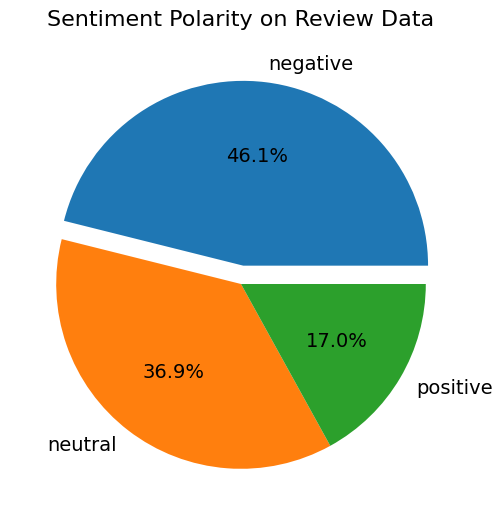

In [29]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in train_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(train_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

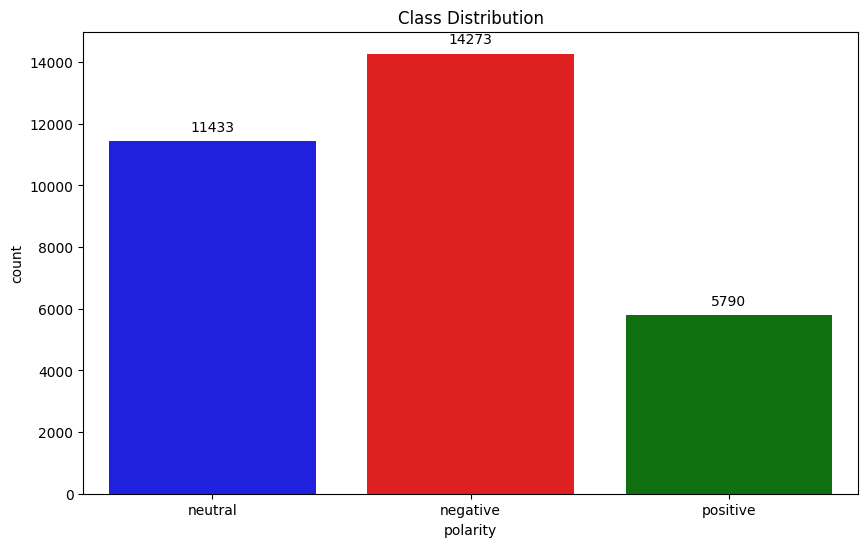

In [31]:
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df, hue='polarity',
              palette={'positive': 'green', 'neutral': 'blue', 'negative': 'red'},
              legend=False)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

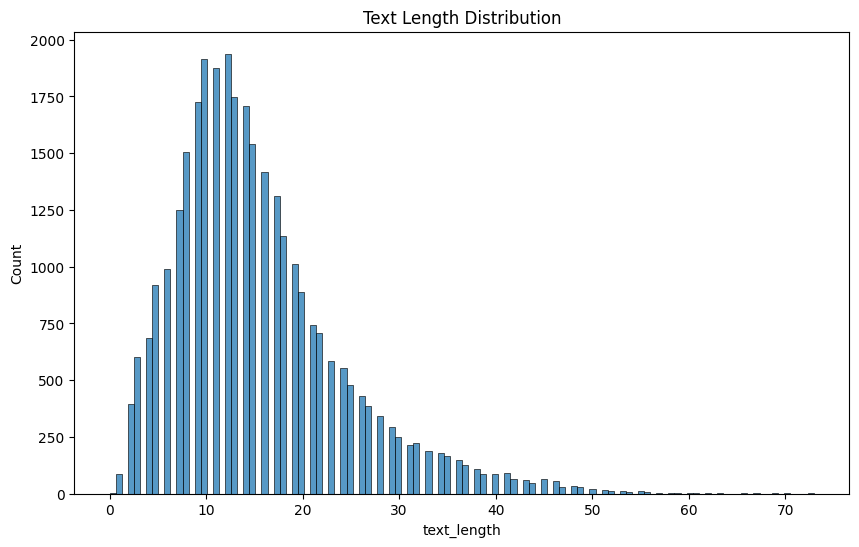

In [32]:
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# **Augmentation**

In [33]:
train_df = train_df[['text_akhir','polarity']]
train_df

,text_akhir,polarity
0,tolong diperbaiki kena masukan daftar ulang no...,neutral
1,min tolong update indikator merah jaringan ama...,negative
3,aplikasi berjalan mudah menyesalkan pakai data...,negative
4,disayangkan pindah hp hp data pastikan terkend...,negative
5,maaf updatean terbaru aksesibilitas pinnya dik...,neutral
...,...,...
38120,mendonlot kali suruh ulang jad susah transeper...,negative
38121,buka liat saldo tf menyesal perbaharui,neutral
38123,kacau nihh pemeliharaan transaksi jdi rumit uj...,negative
38124,rumit updet mulu bikin rumit transaksi udh kay...,negative


In [34]:
# Download WordNet
nltk.download('wordnet')

# Initialize Translator
translator = GoogleTranslator(source='id', target='en')

# Function for synonym replacement
def batch_replace_synonyms(batch_texts):
    augmented_texts = []
    for text in batch_texts:
        words = text.split()
        augmented_words = []

        for word in words:
            syns = wordnet.synsets(word)
            if syns:
                synonym = random.choice(syns).lemmas()[0].name()  # Random synonym
                augmented_words.append(synonym if synonym != word else word)
            else:
                augmented_words.append(word)

        augmented_texts.append(' '.join(augmented_words))
    return augmented_texts

# Function for back-translation
def batch_back_translate(batch_texts):
    try:
        combined_text = " ||| ".join(batch_texts)  # Unique separator
        translated = translator.translate(combined_text, src='id', dest='en').text
        back_translated = translator.translate(translated, src='en', dest='id').text
        return back_translated.split(" ||| ")
    except Exception as e:
        print("⚠️ Translation Error:", e)
        return None  # Return None if translation fails

# Augment dataset with batching
def augment_dataset(df, batch_size=1000):
    augmented_data = []

    # Split dataset into batches
    batches = np.array_split(df, len(df) // batch_size + 1)

    print("🚀 Starting augmentation...")

    for i, batch in enumerate(tqdm(batches, desc="⏳ Processing batches", ascii=">=")):
        original_texts = batch['text_akhir'].tolist()
        polarities = batch['polarity'].tolist()

        # Add original content
        augmented_data.extend([{'text_akhir': content, 'polarity': polarity} for content, polarity in zip(original_texts, polarities)])

        # Synonym replacement
        synonym_replaced_texts = batch_replace_synonyms(original_texts)
        augmented_data.extend([{'text_akhir': content, 'polarity': polarity} for content, polarity in zip(synonym_replaced_texts, polarities)])

        # Back-translation
        back_translated_texts = batch_back_translate(original_texts)
        if back_translated_texts:  # Add only if translation succeeds
            augmented_data.extend([{'text_akhir': content, 'polarity': polarity} for content, polarity in zip(back_translated_texts, polarities)])

        time.sleep(1)  # Prevent API rate limits

    print("✅ Augmentation completed!")

    return pd.DataFrame(augmented_data)

# Run augmentation on the dataset
augmented_df = augment_dataset(train_df)

# Save the dataset
augmented_df.to_csv("augmented_dataset.csv", index=False)

print("📂 Augmented dataset saved!")
print(augmented_df.head(15))  # Show first 15 rows

[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


🚀 Starting augmentation...


⏳ Processing batches:   0%|>>>>>>>>>>| 0/31 [00:00<?, ?it/s]

⚠️ Translation Error: tolong diperbaiki kena masukan daftar ulang nomor tlp sesuai nomorperdana dipakai login bca mobile didlm hp sim card adatidak terdeteksi menggangu ||| min tolong update indikator merah jaringan aman coba pakai wifi hapus cache ulang hp nihil membagongkannya normal vpn tolong fix min aplikasi update ||| aplikasi berjalan mudah menyesalkan pakai data seluler transaksi pakai wifi normal tibatiba kemarin lampu indikator merah transaksi cek saldo app error perangkat hapus data cache install ulang chat customer service bca pakai data seluler ampun dehh mempersulit ||| disayangkan pindah hp hp data pastikan terkendala verifikasi wajah gagal berkalikali hubungi customer service via whatsapp sarannya perbaiki data coba solusi mohon diperbaiki bugs kesulitan transaksi ||| maaf updatean terbaru aksesibilitas pinnya diketik sealnya orang disabilitas pendamping samping nasabah kalangan diperbaiki updatean ||| pelayanan menurun pengaktifan finansial kali gagal mencoba dibilang 

⏳ Processing batches:   3%|>>>>>>>>>>| 1/31 [00:04<02:22,  4.76s/it]

⚠️ Translation Error: aplikasi jalan kartu sim hpmenurut bahaya klo hp hilang orang mudah ganti kode akses kartu sim nempel ||| knp mbca dibuka okt smua opsi perbaikan lakukan jaringan stabil hp update memory aman dibuka blm log langsung shut perbaiki ||| update buka gimana solusinya mematikan fitur aksesibilitas hp dikunci tolong diperbaiki bintang ||| semenjak update aplikasi slalu paksa tutup tolong diperbaiki ulasan terbaru terkait menghapus aplikasi aksesibilitas membantu menghapus aplikasi tolong secepatnya fix ||| hapus data uda berkalikali uninstal install uda berkalikali tetep dibuka update bikin pusing kmrn sblm update ||| upgrade mbankingnya upgrde kmrn tolong transaksi jd susah banget tumben banget tutup app ||| update versi dibukaforce tutup hapus data hapus aplikasi tetep coba install hp bukatolong diperbaiki terima kasih ||| application paksa closed shortly openedbefore update lakukan uninstall dn install ulang paksa tutup mohon developer memperbaiki bugs inisdh coba ber

⏳ Processing batches:   6%|>>>>>>>>>>| 2/31 [00:05<01:16,  2.65s/it]

⚠️ Translation Error: update paksa tutup androidsudah versi terbaru jaringan bagus ||| instaluninstalinstal tetep masuk tulisannya internet stabil bodoh banget ||| susah login masuk langsung sendirihp samsung diganti samsung mohon diatasi ||| update paksa tutup terustidak digunakanpadahal transaksi urgent ||| app paksa tutup update jaringan internet stabilpun apps paksa tutup ||| okt habis update aplikasi hapus install ulang ||| update mbankin bca errorsaya uninstall install mohon diperbaikibaru kali mengalami spt gimana solusi ||| bermasalah paksa tutup bca mobile kali versi terbaru paksa tutup ||| diupdate aplikasi tutup coba kali hapus install tutup ||| terupdate mohon maaf kendalanya gimana suruh update mbangking buka ||| halo mobile bca nih aplikasinya paksa tutup update memori bny jaringan data aman gk dpake ||| bca mobile terupdate otomatis paksa tutup tolong diperbaiki bug versi oktober ||| tolong benahi qris notifikasi saldo kepotong hilang mutasi rekening saldo terpotong ||| 

⏳ Processing batches:  10%|>>>>>>>>>>| 3/31 [00:07<00:56,  2.01s/it]

⚠️ Translation Error: login sms pas masuk aplikasi tetep log peringatan update update coba sms masuk aplikasi menerus solusinya ||| kali coba pas ketiga kali masukin rek tujuan kali coba pulsa habis atur sim card sesuai arahan menonaktifkan sim tolong diperbaiki efektif pelayanan susah nasabah ||| ui tolong diperbarui mempermudah transaksi fungsi menyimpan nomor virtual sesuai pemberian icon pembayar memudahkan pengguna transaksi ||| bca mobile proses verifikasinya susah dicoba belasan kali wifi data seluler hasilnya notifikasinya koneksi internet terputus berbeda bca mobile versi mudah verifikasinya pakai koneksi internet kualitas koneksi internet indonesia gitu stabil ||| update bca versi bermasalah disaat menyimpanmendaftarkan rekening daftar transfersinyaltanda simkard hilang proses gagal teros aplikasi uninstall login ulang problemya sejalan smstidak otomatis versi versi sebelumyadan terpaksa pakai aplikasi versi unduh vua google play store normal kembalisemoga benahi versi terbar

⏳ Processing batches:  13%|=>>>>>>>>>| 4/31 [00:08<00:47,  1.75s/it]

⚠️ Translation Error: opsi top flazz mbca ||| memuaskan sistemnya aman daei penjebolan sistem ||| playanan bagus membantu pngusaha kcil ||| aneh ni aplikasi registrasi x sms ||| membantu mudah ||| kak tnya memverifikasi bca mobile menu abaot mksih ||| aplikasi gilaaavermuk bisaa payahhhh ||| aduh tolong verifikasi wajah hilangin login ||| kesulitan pas masukin nomer atmsudah kirim sms alhasil menu kode akses muncul lapor customer service dapet solusimungkin app error bugmohon bantuannya ||| mbanking bca parah banget login sim connect pake wifi brp sms tersedot bayangin kali brp ayo tolong diperbaiki susah transaksi masak bolak cari atm efisien banget ||| menerima otp ganti hp tata letak katru sim bener sim berisi pulsa koneksi internya penuh otp otp ||| buka aplikasi bca pas dibuka langsung tolong solusinya udh bener kasi bintang tetep gimana ||| kasih bintang tolong bantu bca mobile buka melepas sim card ||| selamat siang mohon balas bca kemarin ganti nomor banking bca berfungsi cek s

⏳ Processing batches:  16%|=>>>>>>>>>| 5/31 [00:09<00:39,  1.54s/it]

⚠️ Translation Error: update aplikasi diakses buka menutup ||| udh gk dibuka appnya saran berguna applikasi dibuka ||| dear yth bca mohon diperbaiki aplikasi mbca pembaruan mengalami paksa tutup terima kasih ||| mudah sederhana perintah macammacam maju bcasemoga jaya ||| kak habis update sistemnya dibuka aplikasinya ||| applikasi buka update forceclose ||| apasih aplikasinya nonaktifin aksebilitas mulu orang aktifin asuuuu ||| dicoba hapus install ulang aplikasinya kendala transaksi cepat kemarin kendala masuk account telepon bca dibantu terima kasih ||| mbangking blm kek mn update kek gini ||| aplikasi bca mobile digital membantu mentrasfer uang semoga maju deh jaya ||| sampe mobile bca emang top markotop bank rumit persyaratan ||| update aplikasi bukasetiap login mental ||| bca pemberitahuan setia bca mobile buka logout ||| forclose tidakbisa buka tolongupdet secepat aktifitas terngagu ||| kecewa update dinonaktifkan aksesibilitasnya dibuka ||| update dibuka klik langsung tutup ||| f

⏳ Processing batches:  19%|=>>>>>>>>>| 6/31 [00:10<00:35,  1.40s/it]

⚠️ Translation Error: rumit banget aplikasi login menghabiskan pulsa bantuan customer service whatsapp penjelasan berbelitbelit suruh telpon nomor bca digit modern jarang orang pakai pulsa sayang banget menghabiskan pulsa berhasil kirain pas liat ulasan play store keluhan maaf rumit bintang ||| tanggal transfer uang pembayaran shopee senilai rp aplikasi cek transaksi transaksi cek shoppe pembayaran transfer nominal aplikasi cek transaksi bca mobile shopee cek saldo berkurang senilai sesuai transferan dikali mohon penjelasannya ||| login transaksi lampu merah signal bagus coba pakai wifi pakai kota data gimana aplikasi yabeda bank sebelah login lampu merah bgtu login langsung transaksi nunggu lampu berubah lampu merah transaksi mobil banking mohon permudah layanan mobil banking ||| secroll ulasan update aplikasi mbca negatif update aplikasi mbca update aplikasinya mengecewakan aplikasi release mohon perbaikan pelayanan nasabah ||| potongan lumayan ribu kali top ||| dear bca tolong pembu

⏳ Processing batches:  23%|==>>>>>>>>| 7/31 [00:12<00:32,  1.35s/it]

⚠️ Translation Error: maaf nanya login bca mobile pakai hp aslinya kartu udh terpasang kuota verifikasi sms udh terkirim loading loadingnya banget ujungnya error aneh beda kek versi langsung verify sms langsung point stuk loading verifikasi tolong perbaiki sulit akses akun bank saran perbaiki login meningkatkan kinerja tampilan trimakasih ||| sebenerny mbca membantu knp update klik jd gk pake pin bikin gk nyaman bikin kuatir takut pas buka mbca kepencet takut trjd gk kembalikan aplikasi sebelumny buka pake pin aman ||| saldo terpotong cek via mutasi rekening otomatis bingung saldonya kemana pengguna bca tahunan tau kalo aturan saldo ngendep transferan temen pas cek lahh pas cek mutasi rekening transferan temen pas nilainya saldo terpotong bca muncul dimutasi rekening sempet mikir nyolong mengecewakan ||| diupdate cek saldo keliatan saldonya infokan percaya bilangnya kendala ditampilkan screenshot tampilkan kirim screenshotnya via gmail tolong solusinya ||| terpaksa bintang masuk aplika

⏳ Processing batches:  26%|==>>>>>>>>| 8/31 [00:13<00:29,  1.29s/it]

⚠️ Translation Error: kali aplikasi update pake hadehhh ||| kecewa banget buka tabungan via online langkah langkah lakukan mengisi sesuai langkah video callnya mengecewakan terusan hbungi tersambung nyanyian terusan sampek muak dengerinnya nunggu jam video call tersambung kampreettt lokasi aktifkan tolong officenya mohon bantuannya gimana rumit menyulitkan ||| mbking pin keblokir suruh daftar fi mesin atm lakukan fan berhasil suruh suruh faftar fi atm lagimang lu gw mesin atm bosribet bca mending pake mandiri ||| terpercaya mudah ||| knp aplikasi tolong scpaty perbaiki menghambat aktifitas ||| bca mobile membantu memudahkan terimakasih ||| ayo admin bank kendala sepele diurusin lampu merah sulit transaksi mempermudah hasilnya kayak gini jaringan bagus buka aplikasi bank mobile lancar ngomong sesuai kenyataan membandingkan uang barang sepeleayo diperbaiki sampe lampu indikator merahtolong diperbaiki ||| bca mobile buka masuk fitur aksesibilitas apl aktifnon aktifin ||| aplikasi dibuka p

⏳ Processing batches:  29%|==>>>>>>>>| 9/31 [00:14<00:27,  1.26s/it]

⚠️ Translation Error: error tolong maintenance diperhatikan kasih pemberitahuan kalo perbaikan jd prepare bank swasta terbesar gini pelayanan mbankingnya ||| transaksi laporaninbox riwayat inbox gk deh update diinstal ulang lapor custumer service hp gini tu habil diupdate fitur keyboard bca rekening gimana solusinya ||| tolong ditambah menunya orang transfer rek cek masuk transfernya bca mobile saldo rekterimakasih ||| selamat siang maaf komplain tawaran program bca telepon kantor bca lngsung tawaran programnya menyimak programnya terganggu kerja melayani customer nomor kantor bca menelpon langsung menawarkan program menjawabnya tertarik pliss ganggu ||| aplikasinya parah suruh verifikasi wajah pas masuk udh orangnya verifikasi wajah ditolak transfer orang rumah urgent mantap bagus jelek ||| bagus mohon perbaiki aplikasi nomor kartu berbeda nomor kartu terdaftar mengaktivasi bca merepotkan pengguna smartphone singel sim mohon pertimbangkan kebijakan terima kasih ||| tolong verifikasi b

⏳ Processing batches:  32%|===>>>>>>>| 10/31 [00:15<00:26,  1.26s/it]

⚠️ Translation Error: pilihan cc bni menu pilihan keybca pembayarab cc bni pilihan cc dibayar terbatas disayangkan pembayaran cc mbanking ||| update terbaru kode qr tiadakan bermanfaat penggunanya kode qr mbca tinggal share keperluan menyambungkan nomer rekening buku tabungannya berguna banget kode qr ||| minggu login berkalikali unistal aplikasi bank dr hp kebanyakan aplikasi udh hapusin aplikasi masuksetiap masukin digit kartu atm langsung ngeblank hitam menu baca komen mengalamiini bca mobile banking ||| halo bca parah banget makan pulsa parah ngisi langsung abis tersambung belom ngomong customer service tolong ngerubah nomor telpon rekening jgn dipersulit kalo langkah mudah email ||| gimana sinyal bagus buka aplikasisending sinyal bagus sumpah kecewa banget servernya ||| muncul pesan error data sesuai verifikasi data konyol nih udh lakukan verifikasi selang sistem bca ||| kirain hp knpa verifikasi wajah gagal pdhl oplas kebanyakan baca ulasan bln kmaren berati sampe skrng diabaikan

⏳ Processing batches:  35%|===>>>>>>>| 11/31 [00:16<00:24,  1.24s/it]

⚠️ Translation Error: gk transferkoneksi terputus truspakai wifi sm bgtukuotapulsa banyakuntuk cek saldobeli pulsa bisatlg infonya bos ||| habis transaksi kali voucher isi ulang prabayar gagal terusvoucher masuk tpi cek saldo kepotong rp gimana nich tanggung bank kansy nasabah dirugikan sekalitolong klo bikin aplikasi faeir biar merugikan nasabah ||| sanggat kecewa ganti hp verifikasi wajah gagal lapor hallo bca penanganan kecewa pake bca peningkatan verifikasi wajah ||| pulsa habis gara verivikasi tpi ujung meresahkan kalo mudah knp persulit mending nyuruh apdete kalo ujung verivikasi plsa habis gara verivikasi mulu pindah bank sungguh meresahkan ||| aneh kode akses bener masukharus blokir aktivasi atmudh gtu kemaren kejadian beli pulsa banking bca saldo berkurang p ulsa sampaiga beresss ||| banget maintenance maintenance sore sampe blm dibuka peretasan error aplikasi nasabah aman bca ||| menyusahkantiap suruh verifikasi ulang nomer terdaftar dislot sim suruh verifikasi ulang mulumau 

⏳ Processing batches:  39%|===>>>>>>>| 12/31 [00:18<00:23,  1.22s/it]

⚠️ Translation Error: verifikasi ulang mending kalo pake pulsa edit menjalankan intruksi sperti verifikasi ulang kemarin seprti ||| pembaharuanaplikasi pakai aplikasi perbaharuipadahal kepentingan mendesak buru buru masuk aplikasimaksa banget perbaharui masuk ||| verifikasi susah ampun muterrr ujungnya notifikasi konelsi internet terputus sinyal bagus tolong perbaiki server ||| jam masuk aplikasi mobile banking cek transaksi jd transaksi masuk gk gk tau ||| pake banking tulisan lbh kesalahan seminggu salah banking nge bobol kahapa perbuat terima kasih ||| kemarin kemarin bca mobile keunstall download buka sampe masukan password habis tulisannya layanan mbca aktif kayak gitu gimana ||| aplikasi banking mempermudah mempersulit verifikasi wajah gagal sarankan hallo bca call back banget menunggu suru bca terdekat enakan aplikasi bca pakai masukin nomer atm kirim sms kelar mempermudah mempersulit ||| knp transaksi susah sgera terhubungloading lamanti ujung koneksi internet terputusgk lhoo b

⏳ Processing batches:  42%|====>>>>>>| 13/31 [00:19<00:21,  1.21s/it]

⚠️ Translation Error: alhamdulillah membaik terkdang mendaftarkan norek susah hapus chace dlu tpi lumayan naikin bintang dlu klo perfect semangat memperbaiki sukses slalu bca mobile ||| fiturnya bagus gk topup ewalet gopay ovo atu mudah dimengerti bingung mohon diperbaiki fiturnya oktomobile cimb niaga ||| selamat pagi bca mobile dipake keterangan sim card sesuai pdhal buka card sinyal jga bagus plsa kirim sms ||| gimana suruh update update gagal mudah rumit tolong solusi gagal update ||| ko lancar transfer virtual account kayak versi lancar banget balasan sistem pemeliharaan gitu tolong perbaiki min sinyal lancar aplikasi udh upgrade ||| diperbarui error parahnya transfer ket gagal aslinya da masuk n saldo berkurang inbox bukti transfer kadang muncul mohon diperbaiki ||| beda hp install login jaringan pulsa center terdekat paham aneh ||| registrasi atm tetep masuk aplikasi mbca klik bca user id sandi bener tulisannya salah melulu buang doang ||| update terbaru feb kemarin kemarin cek 

⏳ Processing batches:  45%|====>>>>>>| 14/31 [00:20<00:21,  1.24s/it]

⚠️ Translation Error: banking bca error barusan cek saldo transfer transaksi diproses silahkan ulangi berkalikali ulangi error minggiu movember ||| perbarui bukaselalu laporan bca mobile berhentitolong perbaiki aplikasi hp sayakarna bca mobile membantu ||| transparan potongan tahutahu kena potongan gede anjng emang kena potongan ||| log sebulan kali masuknya verifikasi ulang pake pulsa org ngecek beli pulsa login ribettt gk buru ||| pas pembukaan rekening susah banget pas video call udh coba gunta ganti kartu kuota dapatjaringan sampe pake wifi tetep susah ||| selesai unggah dokumen perlukan rekening muncul transaksi gagal klik mohon solusinya ||| pendaftaran rekening video call diangkat angkat pas dicoba tulisannya koneksi terputus wifi lancar jaya ||| buka aplikasi tf suruh registrasi ulang mesin atm sudh ulang x tetp update sudh x gk kuga mohon bantuan terimakasi ||| ferifikasi gampang oke bangattapi semenjak update bolak bank ferifikasi wajah doangdari mudah payahbca taulah dibenah

⏳ Processing batches:  48%|====>>>>>>| 15/31 [00:21<00:19,  1.22s/it]

⚠️ Translation Error: turuninupdate versi jaringan sinyal stabil merah pakai wifi buka youtube lancar ||| pelayanannya jelekkkkk kecewa berat bca mall margocity orang nnya cuekin selesai gw pindah orang pelayanannya ||| cek saldo tulisan muncul menu berjalan normal cek saldo ||| skrang aneh private inbox hapus menyusahkan tolong kembalikan fitur ||| aplikasi langsung dibuka ||| akhir² logout pas cek saldo udh verifikasi ulang mengganggu kalo urgent mohon tanggapannya ||| pakai loging ||| login tpi cek saldo riwayat transaksi cek update terbaru tpi stlah update transaksi ||| tolong diperbaiki paksa closed ||| dibuka euy cek berkala tolong perbaiki dipakai nih bca mobile menyusahkan transaksi uninstal pasang dibuka paksa tutup hp nge freeza ||| kirim sms go berhasil masuk bagusan aplikasi sblm tolong min ubah bintang ||| gimna udh sekian kalinya verifikasi ulang aj udh x verifikasi ulang pulsanya bikin rumit ||| registrasi habis pulsa ribu pelayanan sms koneksi stabil muncul notif koneks

⏳ Processing batches:  52%|=====>>>>>| 16/31 [00:22<00:17,  1.19s/it]

⚠️ Translation Error: transaksi proses silahkan coba jaringan bagus habisin pulsa nih bolak login ||| coba registrasi bca mobile ko verifikasi gagal pdhal saldo pulsa rb tpi sms pemberithuan pulsa fitur mohon petunjuk ||| mbca dibukadisaat dibuka kembli sndri alias hilang ||| upgrade dipakai kadang memori upgrade tolong diperbaiki ||| aplikasi bca mobile versi terbuka gimana nih pelayanan mbanking bca ||| daftar memasukan atm kirim pesan menunggu masuk tanda diproses tolong pencerahannya ||| mantap buruan daftar bca mobile ragu ||| abis update verifikasigagal truspdhal pulsa rbsim card trdftr sim sim kosonginmasukin digit benarpdhl sblmnya dipakai mbanking nyako jd bgni gagal kirim sms verifikasisudah tlp halo bcasolusinya lakuin ||| menghabiskan pulsa otp gamasuk masuk giliran chat customer service dibilang tau kode disalahin provider gimana nih butuh dilayani dikasih solusi ||| perpindahan hp semenjak update ko sulit pulsa habis kirim sms mohon solusi ||| bisanya saldo terpotong ribu

⏳ Processing batches:  55%|=====>>>>>| 17/31 [00:23<00:16,  1.17s/it]

⚠️ Translation Error: mw tnya min gnti kartu sya pakai krtu untk daftar banking knppa gk bsa buka jdi hrus hapus dlu aplikasi dftr kmbali pdhl gk sprti mhon pncerahannya min ||| aplikasi bagustapi terkadang buka ||| kembalikan pakai pin aman klau pakai pin nyamanorg jugamksh ||| bca bank sebelah mobile banking lihat saldo aktivasi mbanking fitur menu mbanking aksessaya kasi bintang deh ||| update paksa tutup ||| transfer bca mobile keterangan gagal transfer saldo terpotong mutasi hubungi customer service suruh aplikasi hallobca aplikasi hallobca suruh telepon layanan duh oper gini sampe saldo gk tau kemna tu ||| tingkatkan layanan product transaksi aplikasi bca mobile kalo pitur pay leater belanja online bagus kartu kredit terimakasi ||| uangku habis pagi makanmau narik uang bisasangat menyiksa anak rantauudah update tutup ||| update bagus buruk kualitas aplikasinya mending turu admin sekalinya kerja ngotak ngatik aplikasi bikin susah nasabah ||| membantu ok ||| koq tibatiba keblokir g

⏳ Processing batches:  58%|=====>>>>>| 18/31 [00:25<00:14,  1.14s/it]

⚠️ Translation Error: ko saldo kepotong rb potongan potongan bulanan kepotong ||| knpa aktivasi teks sms ||| knp tiba² tutup aplikasi truspdhl kmren aman² ||| alhamdulillah kelar yutub ||| update kemarin tutup klik ||| kenpa buka pas habis aptudemalzz ||| error tolong perbaiki ||| tolong mutasi diakses ||| paksa tutup buka ||| bca mobile dibuka mohon infonya ||| hadapkan wajah kamera make lampu payah ||| paksa tutup min habis update ||| tolong solusi verifikasi data kalsel susah bank terdekat butuh rb biaya transportasi tolong berbaiki sistemnya memberatkan nasabah solusi terburuk alami ||| mantap membantu bertransaksi ||| bca mobile terbantu transaksi mencari anjungan rumah dimana pokoknya praktis ||| bca mobile oni kebuka ||| hbis update appny forclos trs jd terkendala byr ap ||| buka aplikasi ||| gmau gmau tau uang ngambil uang atm ko uangnya gk atmnya doang udama saldo kepotong takut pake bca besok beralih takut harap kebih hati ||| efektif profesional n canggih ||| bca mobil dibuk

⏳ Processing batches:  61%|======>>>>| 19/31 [00:26<00:13,  1.14s/it]

⚠️ Translation Error: mohon maaf buka mbca kirim sms berkalikali sms balesan gimana make aplikasinya gini ||| butuh update transaksi berjalan tolong fitur pilihan tidakbukanoksaja ||| mudah bertransaksi aplikasi dioperasikan koneksi internet sim didaftarkan terima kasih ||| masukan rek susahselalu hilang koneksi bisatolong diperbaiki ||| bagus transfer melebihi batas limit ||| tanggal date tanggal update tau gk hp udh penuh bingung ngapusin smua aplikasi hp smua coba ||| uda download gk daftarin gimana makai mbanking langsung skali gk hp jadul pulsa kuota internet gb gk gimana bca ||| diupdate jaringannya biru pakai sim card terdaftar mohon diperbaiki ||| wahh keren si bca daftar online langsung jdi aktif mbankingnya tnggl ngambil kartunya kc domisili terdekat sukses bca ||| udh buka tabungan bca platinum daftar mbca gimana butuh pekerjaan ganti rating kalo log ||| tolong jgn perbaharuin aplikasinya kasihan memory hp lelet ||| login update terdaftar pulsanyamohon admin infonyatks ||| g

⏳ Processing batches:  65%|======>>>>| 20/31 [00:27<00:12,  1.14s/it]

⚠️ Translation Error: bca mobile akses terdaftar bca mobile handphone email handphone terblokir ||| ko verifikasi wajah langsung verifikasi wajah digunain ||| bca mobile mmg terbaik kalo saran tolong kedepan sediakan menu transfer bank bca keyboard transaksi mudah menu info saldo transfer bca mutasi bca keyboard terimakasih ||| mbca kirim smsterus tulisan verifikasi sms otomatis mbca aplikasi ||| bank sekelas bca aplikasinya gini rumit banget tf rumit banget daftarkan pake sms balasannya banget beda banget bank bn serba cepat ||| maaf appnya masuk sekalih masukin pin user ||| login klik informasi saldo sllu kode otptrus mnta otp aplikasinya sllu aplikasi akses coba ||| tolong respon mobile bangking inii muncul tulisan layanan bangking aktifsedangkan bisaaa ||| allahhribet banget bolak masuuk bisahrus verifikasi wajah suksessedangkan urgent banget transfer anakknapa bca mengecewakan banget ||| kecewa proses penggantian kartu ganti kartu melalu mbanking menunggu mingguan kartunya terima 

⏳ Processing batches:  68%|======>>>>| 21/31 [00:28<00:11,  1.15s/it]

⚠️ Translation Error: update login registrasi ulang muncul kode ||| sampe top flazz redmi note pro mbca gagal saldo refund parah kartu flazz bca gen topup minimarket deh ||| aplikasi bagus senangsangat mempermudah keperluan mendadaktanpa repot bankupdate cepatterimakasih ||| bca siang buka menu aplikasimasuk masuk menu lihat saldo transaksi lainya ||| sya transfer rekening tokopedia sblm transfer saldo setelh sya tf rban notif saldo ko saldonya tanggal yyg rbnya kmna yplsa nympe saldo hilang ||| aplikasinya canggih serba digital dri pembuatan rekening ganti kartu rusak jdi antri ||| uang hilang cek mutasi rekening riwayat pemotongannya kemarin pemotongan saldo alasan saldo mengendap saldo mengendap kemarin kemana potong saldo mengendap ||| mbanking dipakai keterangan mbanking verifikasi ulang tlp hallo bca jwbn uninstall ditampilan mbking menu install ulang keterangan gagal pdhl jaringan internet stabil kartu terisi pulsa dannomer terdaftar sim langkah hallo bca gagal langsung datengin

⏳ Processing batches:  71%|=======>>>| 22/31 [00:29<00:10,  1.15s/it]

⚠️ Translation Error: cek saldo tulisannya blok item gimana mengecewakan aplikasi mending ||| inovatif update lagicek saldo layar jd hitam jd keliatan saldo aman ||| debit bca bener² dijangka transaksi yadan mengaktifkannya gimna ||| menyedot pulsa pakai akses email bni mobile lebi memudahkan dlm lagin akses ||| knapa buka bca banking support terusudah uninstall masuk ||| hati waspada bca bekasi peretas buka ngisi saldo rb selang saldo hilang tinggal rb aplikasi fitur riwayat transakasi cek uang hilang susah dilacak ||| gimana nih udh kena admin saldo msuk kena potongan saldo berkurang smntara banking pin tau klik ||| verifikasi ulang habisin pulsa bangke aplikasi kesini beres gila ||| assalammualaikum mohon bantuan kak masuk aplikasi pas kirim sms terkirim aplikasi verifikasi gagal gmna ||| min buka rek isi pas videocall customer service blank beranda layar hp mah alhamdulillah kendala min pikir maintance gitu coba tetep ||| loading lelet dibandingkan mbanking maintenance hasil update

⏳ Processing batches:  74%|=======>>>| 23/31 [00:30<00:09,  1.15s/it]

⚠️ Translation Error: assalamualaikum bapakibu masukkan digit nomer rekening pulsa kartu slot registrasi bermasalah loading terusan mohon bantuannya ||| gimana bentar upgrade versi terbaru upgeade pake apl buru dikecewakan bintang ||| abis update liat saldo muncul item gk tulisannya tlong perbaiki ||| good disaat cek saldo sim card pakai berbeda kali verifikasi mobile bcawhy ||| susah banget masuk ajaa foto bener gagal terusss masuk model kayak kalo foto kalo gagal ngikutin intruksi ||| suka pame banking bca gampang n mudah klo tolong permudah klo ganty krna kartu hp rusak bank urusin banking biyar mempermudahmakasih ||| buka rekening isi data lancar giliran video call angkat pagi angkat² permudah si ||| akun ngk masun lagidi suruh ulang verifikasipas verifikasi ulang keterangan internet terputus internet stabil butuhnya pas pandemi mengecewakan ||| sinyal handphone full sim terbaca aplikasi tulisan sim terdaftar trs terkendala ||| hp oppo f pro daftar layar ngeblank layar ayolah perba

⏳ Processing batches:  77%|=======>>>| 24/31 [00:32<00:08,  1.18s/it]

⚠️ Translation Error: maintenance aplikasi mempengaruhi transaksi amergacy kirim uang transaksi maintenance ||| transfer relasi keluarga masuk daftar transfer langsung copas simpan rek daftar rek ||| beli pulsa rb masuk saldo kepotong telfon call center pengurusan banget menghabiskan pulsa rb pelayanan bikin nunggu banget ||| sealu crash one ui android tolong perbaiki menghambat kebutuhan perbankan ||| gimana kalo sim card daftarkan wktu aktivasi terblokir pas buka mbca krna beda kartu bantuannnya min ||| terimakasih bca mobile aplikasi mempermudah pekerjaan ad lancaaarr terimakasihhh ||| habis trs tutup buka aplikasi knp bca nongol membukanya menganggu main game ||| suka banget aplikasi bca mobile membantu transferan isi ulang pulsa token listrik u bca ||| saldo ilang aneh bangetbayar biaya bulanan kemarin kemarin skrng berkurang lagijdi males simpen uang bca ||| bca mobile dipake keteranganya sim card gunakana cocok sim kedaftar bca mobile ||| mohon maaf hp direset engga masuk langka

⏳ Processing batches:  81%|========>>| 25/31 [00:33<00:07,  1.17s/it]

⚠️ Translation Error: pake mbanking aman aman saldo kepotong cek saldo aneh ||| update nambah nomor rekening pulsa koneksi gagal ||| plis fix android masuk logib aktivasi pulsa sms teekirim login ||| susah kalo bintang kasih pakai wifi daftar mulu ||| payah nie bca maintennence error deh aplikasi gx tf pindah dh mandiri livin mandiri ok ||| min knp transaksi selalunya kode otorisasi mslhnya kode otorisasi ad kode dr tolong bantu min ||| suka logout urgent tf pas verifikasi banget mantep ||| daftar ulang scan wajah berkali kali ||| login sim card sesuai sruh verivikasi ulang bca mobile menu gimana ||| ngecek saldo diupdate pas diupdate mengecewakan ||| kartu telkomsel pengguna mobile banking bca sungguh butuh akses cepat luas mohon kerjasama telkomsel puas ||| install berkali loading mulu kelaraplikasi tpi tindak lanjuty memuaskanhdeeeeh ||| verifikasi berkali kali data sinyal ||| klo mu vermuk bener tingkatin kualitas giliran vermuk bikin rumit customergak ||| nih masuk banking lampu i

⏳ Processing batches:  84%|========>>| 26/31 [00:34<00:05,  1.16s/it]

⚠️ Translation Error: cek saldo diupdate aplikasi bca mobile diupdate mohon dibantu solusinya ||| pas daftar video call ngk diangkatt angkatnya siapnya pd stanbay jam wib wibtapi telfon berkahirlah kali ngk masuk nada sambung bordering ||| bca kek gajels bangkeapaan si motong sebulan berkali ||| knapa stiap login verifikasi verifikasi tetep login ||| daftar rek tranfr uang bsa daftr klo rekening tersimpan ||| berkali kali coba telepon customer service video call jam wib jam ||| apl knpa coba habis ganti hp verifikasi ulang gagal data bener ||| bca mobile dr menggunakannya gk transfer rek terdftrbaik bca ato bank jd transfer rek terdftr sjmhn infonya limit rek tujuan transfertrima kasih ||| pemeliharaan aplikasi kahkok susah transaksitelogout ||| aplikasinya aneh vermuk buka kamera hp aplikasinya rusak ||| bagus membantu ||| bertransaksi bca moblie efisien fiturnyalebih good lahlebih gampang ||| cek saldo nilai rupiahnyakosong blank bawahnya aa tulisan oktp transaksi ||| bagus aplikasi 

⏳ Processing batches:  87%|========>>| 27/31 [00:35<00:04,  1.15s/it]

⚠️ Translation Error: aplikasi bagustidak kendala apakalau tambahin notif dana masuk rekening ||| membantu ||| aplikasinya dibuka ||| pin bener terdeteksinya salah gimana udh coba ulang kali kalo sampe kali keblokir ||| update gk baca qris hasil screenshot kemairn ||| puluhan kali mencoba vcall tersambungkoneksi putus coba jam sibuk ||| ko buka bangkingnya ||| upgrade minggu upgrade lampu indikator merah mulu ||| seminggu update skr sruh update hadehh jd gitu pdhl suka mbca prnh ||| koq buka yaasal buka ||| mantep banget bca update yaaa sukses pokoknya bca mengecewakan customer mu ||| update dipakai ||| rekening sekelas tahapan xpresi x biaya administrasinya pembukaan rekening biaya administrasi perbulan kedepannya berhenti nasabah bca ||| verifikasi data data bisa² coba kali ||| perbarui forclose ||| maaf bintang verifikasi ulang pake pulsa update aplikasi mulu ||| update verifikasi terusan x bosx dapet hadiah ||| kemrin update skarang update lagimemory penuh lampu indikator merah |||

⏳ Processing batches:  90%|=========>| 28/31 [00:36<00:03,  1.14s/it]

⚠️ Translation Error: transferin org saldo masuk dimutasi rekening masukini gmnnnnn rugi ||| verifikasi wajah gagal software canggih pakai verifikasi wajah software verifikasi wajah mumpuni menyusahkan ||| daftar rek susah tlp sim pulsa mencukupi susah transf rek terhambat ||| berharap login app login biometriknyabiar mudah cepat bertransaksi ||| pakai bca mobile membantu hebat aplikasi langsung kasih bintang good job bca semoga mantap fasilitas ||| aplikasi diluar area ||| verif data pake jaringan wifi x gagal tahap video call ||| bca banking tibatiba saldo ditransfer dicek pas cek saldonya ||| error jaringan hilang jaringan aman nonton youtube tolong diperbaikin aplikasi bca mobile transfer ketunda ||| kirim sms berkali habis pulsa bsa daftar rek online tolong diperbaiki aplikasinya ||| rekening transaksi pembayaran pas menu sms gagal pulsa adatapi gagal mohon bantuan ||| kebobolan atmisi pulsa salah pintapi blg salah suru ulangibegitu ulang suara gradak liat saldo sisa ributapi tidk

⏳ Processing batches:  94%|=========>| 29/31 [00:37<00:02,  1.13s/it]

⚠️ Translation Error: sayang banget sekelas bank nasional karyawan tau kerja sesuai gk kerja profesionalseharusnya bca malu aplikasi danapada transaksi bca danatapi dana butuh jam uang rekeningtapi bca kunjung mengembalikan uang rekeningsaya pegawai bca buta internetjadi sebulan mengembalikan uang rekening nasabah ||| update indikatornya merah jd dipakai heran deh ||| layanan bagusgagal mulu alasannya koneksi terputus pakai wifikenapa aplikasi buatan iniya ||| gimana upgrade susah buka nyusahin banget tolong developer perbaiki ||| min login trustolong gmna inu kartu pakai sim sim lepas jgagmna min kasih solusinya pliss ||| dipakai transaksi sinyal full buka aplikasi normal ||| buka rekening online mobile banking susah sesi ambil fotonyatolong perbaiki mempermudah proses buka rekening nyatks ||| uda masukin digit nmor kartu connect pulsa rbu internet pakek wifi blon ||| mempermudah kebutuhan sibuk bca mobil membantu mempercepat transaksi ||| update knp digunain transaksi ||| log sendiri

⏳ Processing batches:  97%|=========>| 30/31 [00:38<00:01,  1.13s/it]

⚠️ Translation Error: potongan rb pdhl saldo rekening kosong maksudnya biaya si ||| rumit verifikasi wajah verifikasi gagal rumit banget ||| dri smua e bangking bca mobile sederhana menu mudah pahami jarang ad gangguanpokonya mantap membatu bnget krna sya dri atmpunya rek bca wktu maih krja phk berguna usaha kecilan ||| lupa sandi mbca guasalah kali verifikasi ulang sms berbayar sms habis gagal proses muncul internet lemah habis deh pulsa gw gk dapet hasil ||| login bca mobile hp masukin kartu atm kirim sms pulsa terpotong belom masuk bca belom masuk saldo tetep potong ||| upgrade versi masuk aplikasi masuk ||| fikir pakai bca org bilang aplikasinya bagus pakai ovo bagus ovo diluar ekspekrasi ||| bca mobile icon tombol hilang user interfacenya susah gini tolong perbaiki ||| ni bca pelayanan bangt buka tabungan seharian telponin costumer srvice balasan pergi cabang terdekat udh syariah aceh aplikasi ||| rek ud online videocall masukkan dana rek transfer ko saldo masuk rek tolong pencera

⏳ Processing batches: 100%|==========| 31/31 [00:39<00:00,  1.29s/it]


✅ Augmentation completed!
📂 Augmented dataset saved!
                                           text_akhir  polarity
0   tolong diperbaiki kena masukan daftar ulang no...   neutral
1   min tolong update indikator merah jaringan ama...  negative
2   aplikasi berjalan mudah menyesalkan pakai data...  negative
3   disayangkan pindah hp hp data pastikan terkend...  negative
4   maaf updatean terbaru aksesibilitas pinnya dik...   neutral
5   pelayanan menurun pengaktifan finansial kali g...  positive
6   sungguh kecewa aplikasi bca mobile menerima tr...  positive
7   update aplikasi cacattanpa data seluler smua f...  negative
8   tolong diperbaiki bolak suruh verif ulang seha...  negative
9   jelek aplikasinya pindah data ganti hp bilangn...  negative
10  protokol keamanan logika pake kehabisan quota ...   neutral
11  kak q bikin banking bca keteranganya jaringan ...   neutral
12  tolong perbaiki aplikasinya bayar makanan pake...  positive
13  halloooo bca login ulang mbangking bisaa yaahh.

In [35]:
augmented_df['polarity'].value_counts()

,count
polarity,
negative,28546
neutral,22866
positive,10512


# **Load Augmented Data**

In [36]:
train_df = pd.read_csv("/content/augmented_dataset.csv")

# **Data Splitting**

In [37]:
train_df.head(3)

,text_akhir,polarity
0,tolong diperbaiki kena masukan daftar ulang no...,neutral
1,min tolong update indikator merah jaringan ama...,negative
2,aplikasi berjalan mudah menyesalkan pakai data...,negative


In [38]:
train_df.dropna(subset=['text_akhir'], inplace=True)

In [39]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = train_df['text_akhir']
y = train_df['polarity']

In [40]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [41]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [42]:
# Define class labels
classes = np.array(["negative", "positive", "neutral"])

# Compute class weights
weights = compute_class_weight("balanced", classes=classes, y=y_train)

# Convert to dictionary format
class_weight_dict = dict(zip(classes, weights))

class_weight_dict

{'negative': 0.7207671264769222,
 'positive': 1.9682123415583899,
 'neutral': 0.9053755186342783}

# **Data Train**

# **Random Forest**

In [43]:
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9891791496749708
Random Forest - accuracy_test: 0.8845284237726099


In [44]:
from sklearn.metrics import classification_report

print("\nFinal Results for RM:")
print('RM Model Training Accuracy:', accuracy_train_rf)
print('RM Model Testing Accuracy:', accuracy_test_rf)
print("\nDetailed Classification Report for RM:")
print(classification_report(y_test, y_pred_test_rf))


Final Results for RM:
RM Model Training Accuracy: 0.9891791496749708
RM Model Testing Accuracy: 0.8845284237726099

Detailed Classification Report for RM:
              precision    recall  f1-score   support

    negative       0.90      0.93      0.91      2852
     neutral       0.86      0.86      0.86      2311
    positive       0.91      0.82      0.86      1029

    accuracy                           0.88      6192
   macro avg       0.89      0.87      0.88      6192
weighted avg       0.88      0.88      0.88      6192



# **SVM**

In [45]:
# Create an SVM classifier object
svm_model = SVC (C = 1, kernel = 'rbf', class_weight=class_weight_dict, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on training and testing data
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print("\nFinal Results for SVM:")
print('SVM Model Training Accuracy:', accuracy_train_svm)
print('SVM Model Testing Accuracy:', accuracy_test_svm)
print("\nDetailed Classification Report for SVM:")
print(classification_report(y_test, y_pred_test_svm))


Final Results for SVM:
SVM Model Training Accuracy: 0.8919530019784391
SVM Model Testing Accuracy: 0.8032945736434108

Detailed Classification Report for SVM:
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      2852
     neutral       0.77      0.74      0.75      2311
    positive       0.72      0.83      0.77      1029

    accuracy                           0.80      6192
   macro avg       0.79      0.80      0.79      6192
weighted avg       0.81      0.80      0.80      6192



# **LSTM with Word Embeding**

In [46]:
max_words = 10000  # Adjust based on your vocabulary size
max_len = 100     # Adjust based on your sequence length
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the original text data (train_df['text_akhir'])
tokenizer.fit_on_texts(train_df['text_akhir'])
sequences = tokenizer.texts_to_sequences(train_df['text_akhir'])
X = pad_sequences(sequences, maxlen=max_len)

In [47]:
# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the LSTM model


embedding_dim = 100 # Adjust based on your needs
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(128))  # Adjust the number of LSTM units
model.add(Dense(3, activation='softmax')) # Output layer with softmax for multi-class classification


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Convert labels to numerical representations
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
y_train = np.array([label_mapping[label] for label in y_train])
y_val = np.array([label_mapping[label] for label in y_val])
y_test = np.array([label_mapping[label] for label in y_test])

In [49]:
start_time = time.time()
# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()
print(f"Training Time: {end_time - start_time:.4f} seconds")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7271 - loss: 0.5934 - val_accuracy: 0.9008 - val_loss: 0.2551
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9351 - loss: 0.1729 - val_accuracy: 0.9326 - val_loss: 0.1725
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9629 - loss: 0.1056 - val_accuracy: 0.9351 - val_loss: 0.1709
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9746 - loss: 0.0715 - val_accuracy: 0.9489 - val_loss: 0.1546
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9814 - loss: 0.0542 - val_accuracy: 0.9504 - val_loss: 0.1477
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9860 - loss: 0.0418 - val_accuracy: 0.9497 - val_loss: 0.1610
Epoch 7/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9880 - loss: 0.0352 - val_accuracy: 0.9526 - val_loss: 0.1668
Epoch 8/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9913 - loss: 0.0283 - val_accuracy:

In [50]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4180
           1       0.93      0.93      0.93      3484
           2       0.97      0.89      0.93      1624

    accuracy                           0.95      9288
   macro avg       0.95      0.94      0.94      9288
weighted avg       0.95      0.95      0.95      9288



In [51]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = random_forest.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru: aplikasinya jelek
Sentimen kalimat baru adalah POSITIF.
